# Project: Predicting Stock Price & Return  
Feature Creation
## ver 0.1  
All guidance and guildlines provided by Romeo Kienzler

### Guidance - Feature Creation  
This task transforms input columns of various relations into additional columns to improve model performance. A subset of those features can be created in an initial task (for example, one-hot encoding of categorical variables or normalization of numerical variables). Some others require business understanding or multiple iterations to be considered. This task is one of those benefiting the most from the highly iterative nature of this method.

### Guildlines for feature transformation  
- Imputing  
Some algoriths are very sensitive to missing values. Therefore, imputing allows for filling of empty fields based on its value distribution  
- Imputed time-seies quantization  
Time series often contain streams with measurements at different timestamps. Therefore, it is beneficial to quantize measurements to a common "heart beat: and impute the corresponding values. This can be done by sampling from the source time series distributions on the respective quantized time steps  
- Scaling / Normalizing / Centering  
Some algorithms are very sensitive differences in value ranges for individual fields. Therefore, it is best practice to center data around zero and scale values to a standard deviation of one  
- Filtering  
Sometimes imputing values doesn't perform well, therefore deletion of low quality records is a better strategy  
- Discretizing  
Continuous fileds might confuse the model, e.g. a discrete set of age ranges sometimes performs better than continuous values, especially on smaller amounts of data and with simpler models

### Guildlines for feature creation  
- One-hot-enconding  
Categorical integer features should be transformed into "one-hot" vectors. In relational terms this results in additional columns - one columns for each distinct category  
- Time-to-Frequency transformation  
Time-series (and sometimes also sequence data) is recorded in the time domain but can easily transformed into the frequency domain e.g. using FFT (Fast Fourier transformation)  
- Month-From-Date  
Creating an additional feature containing the month independent from data captures seasonal aspects. Sometimes further discretization in to quarters helps as well  
- Aggregate-on-Target  
Simply aggregating fields the target variable (or even other fields) can improve performance, e.g. count number of data points per ZIP code or take the median of all values by geographical region


#### 0.Import packages

In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [569]:
#let the notebook display full length of the data columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

#### 1. Create target

In [570]:
df = pd.read_csv("data_transformed.csv", parse_dates=['date'], index_col='date')

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4382 entries, 2003-01-02 to 2019-10-18
Data columns (total 21 columns):
loblaw_price           4382 non-null float64
loblaw_volume          4382 non-null float64
metro_price            4382 non-null float64
metro_volume           4382 non-null float64
empa_price             4382 non-null float64
empa_volume            4382 non-null float64
gwl_price              4382 non-null float64
gwl_volume             4382 non-null float64
atd_price              4382 non-null float64
atd_volume             4382 non-null float64
tsx_price              4382 non-null float64
tsx_volume             4382 non-null float64
sp500_price            4382 non-null float64
sp500_volume           4382 non-null float64
BCPI                   4382 non-null float64
CPI                    4382 non-null float64
bank_interest          4382 non-null float64
CEER                   4382 non-null float64
trend_grocery_store    4122 non-null float64
trend_loblaws       

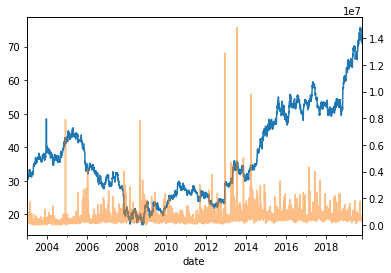

In [572]:
df['loblaw_price'].plot()
df['loblaw_volume'].plot(secondary_y=True, alpha=0.5)

In [573]:
df['loblaw_5d_pct'] = df.loblaw_price.pct_change(5)

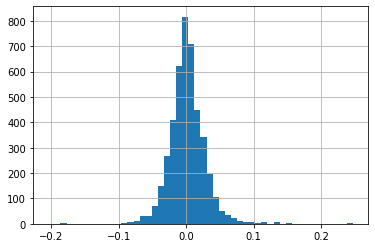

In [574]:
df['loblaw_5d_pct'].hist(bins=50)

In [575]:
df['loblaw_5d_future'] = df['loblaw_price'].shift(-5)
df['loblaw_5d_future_pct'] = df['loblaw_5d_future'].pct_change(5)

In [576]:
df.tail(10)

,loblaw_price,loblaw_volume,metro_price,metro_volume,empa_price,empa_volume,gwl_price,gwl_volume,atd_price,atd_volume,tsx_price,tsx_volume,sp500_price,sp500_volume,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock,loblaw_5d_pct,loblaw_5d_future,loblaw_5d_future_pct
date,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,75.110,317700.0,58.15,568100.0,36.8151,367664.0,111.50,216800.0,40.380,1136853.0,16421.8008,155833300.0,2938.7900,2.940140e+09,432.33,136.8,3.95,117.16,80.0,34.0,64.0,-0.004638,72.805,-0.030688
2019-10-08,74.030,546600.0,57.69,598900.0,36.3368,441693.0,110.57,239800.0,40.030,2054431.0,16294.0000,198432200.0,2893.0601,3.356450e+09,432.33,136.8,3.95,117.08,80.0,34.0,64.0,-0.010426,72.600,-0.019316
2019-10-09,74.150,659800.0,57.74,467000.0,35.9580,433538.0,111.50,184200.0,40.880,2100359.0,16379.9004,168389300.0,2919.3999,2.726820e+09,432.33,136.8,3.95,117.03,80.0,34.0,64.0,-0.009749,71.620,-0.034120
2019-10-10,73.430,591200.0,57.20,471700.0,35.3800,865449.0,110.96,114500.0,40.100,1739158.0,16422.6992,186014600.0,2938.1299,3.217250e+09,432.33,136.8,3.95,117.15,80.0,34.0,64.0,-0.023537,71.500,-0.026284
2019-10-11,73.010,428000.0,56.41,384100.0,35.1300,615587.0,110.24,102100.0,39.330,1415028.0,16415.1992,200746600.0,2970.2700,3.580460e+09,432.33,136.8,3.95,117.75,80.0,34.0,64.0,-0.024582,71.220,-0.024517
2019-10-14,72.805,437050.0,56.50,505550.0,35.0250,501072.0,109.77,104600.0,39.505,1352527.0,16416.7998,206539800.0,2966.1499,2.557020e+09,432.33,136.8,3.95,117.75,80.0,34.0,64.0,-0.030688,NaN,-0.021770
2019-10-15,72.600,446100.0,56.59,627000.0,34.9200,386557.0,109.30,107100.0,39.680,1290026.0,16418.4004,212333000.0,2995.6799,3.340740e+09,432.33,136.8,3.95,117.75,80.0,34.0,64.0,-0.019316,NaN,-0.019008
2019-10-16,71.620,716200.0,56.06,435900.0,34.7000,805510.0,109.22,170900.0,39.580,1623424.0,16427.1992,165968300.0,2989.6899,3.222570e+09,432.33,136.8,3.95,117.75,80.0,34.0,64.0,-0.034120,NaN,-0.005585
2019-10-17,71.500,528200.0,56.23,700600.0,35.1300,576685.0,109.28,120000.0,39.170,1868090.0,16426.3008,168397700.0,2997.9500,3.115960e+09,432.33,136.8,3.95,117.75,80.0,34.0,64.0,-0.026284,NaN,-0.003916


In [577]:
print(df['loblaw_5d_future_pct'].quantile(0.2))
print(df['loblaw_5d_future_pct'].quantile(0.4))
print(df['loblaw_5d_future_pct'].quantile(0.6))
print(df['loblaw_5d_future_pct'].quantile(0.8))

-0.017055310942093737
-0.004444997819762509
0.005179338673991429
0.019379469715438982


In [578]:
df['loblaws_5d_return_level'] = pd.qcut(df['loblaw_5d_future_pct'], 5, labels=False)

In [626]:
df['loblaw_1d_future'] = df['loblaw_price'].shift(-1)
df['loblaw_1d_future_pct'] = df['loblaw_5d_future'].pct_change(1)
df['loblaws_1d_return_level'] = pd.qcut(df['loblaw_1d_future_pct'], 5, labels=False)

In [627]:
df['loblaw_20d_future'] = df['loblaw_price'].shift(-20)
df['loblaw_20d_future_pct'] = df['loblaw_20d_future'].pct_change(20)
df['loblaws_20d_return_level'] = pd.qcut(df['loblaw_20d_future_pct'], 5, labels=False)


In [628]:
df.head()

,loblaw_price,loblaw_volume,metro_price,metro_volume,empa_price,empa_volume,gwl_price,gwl_volume,atd_price,atd_volume,tsx_price,tsx_volume,sp500_price,sp500_volume,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock,loblaw_5d_pct,loblaw_5d_future,loblaw_5d_future_pct,return_level,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,weekday_1,weekday_2,weekday_3,weekday_4,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53,loblaw_1d_future,loblaw_1d_future_pct,loblaws_1d_return_level,loblaw_20d_future,loblaw_20d_future_pct,loblaws_20d_return_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,39.8009,0.0,4.0264,0.0,4.8511,0.0,75.68425,0.0,1.2986,0.0,8257.3003,0.0,1110.20,1.090350e+09,356.112,103.300000,4.5,113.18,47.000000,27.000000,17.000000,-0.088771,39.9043,0.002598,2.0,-0.088771,39.358584,35.728581,0.020996,3.915643,3.513866,0.005618,4.815159,4.743246,0.025000,73.324504,71.593873,0.043220,1.260595,0.955999,0.014809,8098.536678,7353.959744,0.013914,1089.164406,995.104081,58580.0,64980.0,15703.2,14780.0,486040.8,34763760.0,9.090640e+08,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40.1113,NaN,NaN,38.8875,NaN,NaN
2004-01-02,40.1113,138500.0,4.0356,1534500.0,4.9414,23640.0,76.29230,39200.0,1.3143,248988.0,8293.7002,51827800.0,1108.48,1.153200e+09,359.414,103.314286,4.5,113.27,46.857143,26.928571,16.952381,-0.171726,39.4905,-0.015477,1.0,-0.171726,39.430271,35.763504,0.023329,3.927067,3.518024,0.024337,4.827182,4.744825,0.033235,73.607151,71.631311,0.055832,1.265710,0.958854,0.019283,8117.123680,7361.447715,0.011488,1091.003986,996.007474,86280.0,371880.0,20431.2,22620.0,535838.4,45129320.0,1.068490e+09,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.9635,-0.010370,0.0,38.7811,NaN,NaN
2004-01-05,39.9635,151800.0,3.9620,171600.0,4.8872,23703.0,74.92410,40500.0,1.3257,6178356.0,8381.7002,133797400.0,1122.22,1.578200e+09,362.716,103.328571,4.5,113.83,46.714286,26.857143,16.904762,0.014253,39.7979,-0.004144,2.0,0.014253,39.481055,35.796970,-0.006918,3.930394,3.521561,0.009314,4.832898,4.745959,0.004269,73.732575,71.657548,0.067821,1.271423,0.961778,0.014672,8142.321444,7369.577217,0.011483,1093.976940,997.013152,100960.0,386700.0,22998.6,25680.0,1726500.0,59494980.0,1.172370e+09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.8748,0.007784,4.0,39.3900,NaN,NaN
2004-01-06,39.8748,372500.0,4.0467,2180700.0,4.8330,265395.0,74.54770,52700.0,1.2986,3894228.0,8405.0996,190509700.0,1123.67,1.494500e+09,366.018,103.342857,4.5,113.53,46.571429,26.785714,16.857143,0.012002,39.3132,-0.014084,1.0,0.012002,39.518555,35.829462,0.006442,3.941471,3.525746,-0.003731,4.832908,4.746653,-0.001164,73.810206,71.680577,-0.001615,1.274011,0.964461,0.023290,8167.347935,7377.828392,0.012644,1096.804850,998.022370,146780.0,807120.0,66635.4,29200.0,2124566.4,83429760.0,1.268750e+09,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### 2. Create stock-related features

In [579]:
feature_columns = [column for column in df.columns if 'price' in column]

In [580]:
for column in [column for column in df.columns if 'price' in column]:
    df[column + "_5d_pct"] = df[column].pct_change(5)
    feature_columns.append(column + "_5d_pct")

    df[column + "_ema20"] = df[column].ewm(span=20, adjust=False).mean()
    feature_columns.append(column + "_ema20")

    df[column + "_ema250"] = df[column].ewm(span=250, adjust=False).mean()
    feature_columns.append(column + "_ema250")

In [581]:
for column in [column for column in df.columns if 'volume' in column]:
    df[column + "_5d_rolling"] = df[column].rolling(window=5).mean()
    feature_columns.append(column + "_5d_rolling")

In [582]:
df.head(10)

,loblaw_price,loblaw_volume,metro_price,metro_volume,empa_price,empa_volume,gwl_price,gwl_volume,atd_price,atd_volume,tsx_price,tsx_volume,sp500_price,sp500_volume,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock,loblaw_5d_pct,loblaw_5d_future,loblaw_5d_future_pct,return_level,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-02,31.6037,134900.0,3.1325,101400.0,5.1538,17982.0,65.4457,133000.0,0.7302,296784.0,6740.1001,76406700.0,909.03,1.229200e+09,305.898,102.00625,4.5,96.70,NaN,NaN,NaN,NaN,31.8964,NaN,NaN,NaN,31.603700,31.603700,NaN,3.132500,3.132500,NaN,5.153800,5.153800,NaN,65.445700,65.445700,NaN,0.730200,0.730200,NaN,6740.100100,6740.100100,NaN,909.030000,909.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,31.3404,48500.0,3.1501,273600.0,5.1797,34761.0,65.3670,9300.0,0.7091,2904300.0,6772.7002,74780400.0,908.59,1.130800e+09,306.836,102.01250,4.5,97.08,NaN,NaN,NaN,NaN,31.3696,NaN,NaN,NaN,31.578624,31.601602,NaN,3.134176,3.132640,NaN,5.156267,5.154006,NaN,65.438205,65.445073,NaN,0.728190,0.730032,NaN,6743.204871,6740.359862,NaN,908.988095,909.026494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,31.5452,232700.0,3.1361,161700.0,5.1971,64512.0,65.5529,99400.0,0.7036,541584.0,6837.2998,142266300.0,929.01,1.435900e+09,307.774,102.01875,4.5,97.34,NaN,NaN,NaN,NaN,31.3696,NaN,NaN,NaN,31.575441,31.601153,NaN,3.134359,3.132668,NaN,5.160156,5.154350,NaN,65.449128,65.445932,NaN,0.725849,0.729821,NaN,6752.166293,6741.132292,NaN,910.894943,909.185725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,31.6037,842600.0,3.1501,945900.0,5.2317,366657.0,65.7675,54400.0,0.7004,685632.0,6802.7998,150351200.0,922.93,1.545200e+09,308.712,102.02500,4.5,97.42,NaN,NaN,NaN,NaN,31.3696,NaN,NaN,NaN,31.578132,31.601173,NaN,3.135859,3.132807,NaN,5.166969,5.154966,NaN,65.479449,65.448494,NaN,0.723425,0.729587,NaN,6756.988532,6741.623666,NaN,912.041139,909.295241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,31.5452,423900.0,3.1325,301800.0,5.1624,179112.0,65.4814,227400.0,0.6759,1697196.0,6723.1001,145587400.0,909.93,1.467600e+09,309.650,102.03125,4.5,97.21,NaN,NaN,NaN,NaN,31.1707,NaN,NaN,NaN,31.574996,31.600727,NaN,3.135539,3.132804,NaN,5.166534,5.155025,NaN,65.479635,65.448757,NaN,0.718899,0.729159,NaN,6753.761062,6741.476068,NaN,911.840078,909.300299,336520.0,356880.0,132604.8,104700.0,1225099.2,117878400.0,1.361740e+09
2003-01-09,31.8964,275900.0,3.2029,351300.0,5.1711,50151.0,66.5185,200400.0,0.6520,3162756.0,6772.2002,150295600.0,927.57,1.560300e+09,310.926,102.03750,4.5,97.71,NaN,NaN,NaN,0.009262,31.0185,-0.027523,0.0,0.009262,31.605606,31.603083,0.022474,3.141954,3.133363,0.003357,5.166969,5.155153,0.016392,65.578575,65.457280,-0.107094,0.712527,0.728544,0.004763,6755.517171,6741.720882,0.020395,913.338166,909.445874,364720.0,406860.0,139038.6,118180.0,1798293.6,132656180.0,1.427960e+09
2003-01-10,31.3696,453600.0,3.1677,127800.0,5.1538,13776.0,66.6258,33000.0,0.6602,4770720.0,6801.7998,179604000.0,927.57,1.485400e+09,312.202,102.04375,4.5,97.85,NaN,NaN,NaN,0.000932,30.5620,-0.025745,0.0,0.000932,31.583129,31.601222,0.005587,3.144406,3.133636,-0.005000,5.165715,5.155143,0.019257,65.678310,65.466591,-0.068961,0.707544,0.728000,0.004297,6759.925040,6742.199598,0.020890,914.693579,909.590290,445740.0,377700.0,134841.6,122920.0,2171577.6,153620900.0,1.498880e+09
2003-01-13,31.3696,359700.0,3.1994,820200.0,5.3280,46653.0,66.6473,62100.0,0.6732,685728.0,6809.8999,144533100.0,926.26,1.396300e+09,313.478,102.05000,

#### 3. Create one-hot-coding features

In [583]:
dayofweek = pd.get_dummies(df.index.dayofweek, prefix='weekday', drop_first=True)
dayofweek.index = df.index

In [584]:
weekofyear = pd.get_dummies(df.index.weekofyear, prefix='week', drop_first=True)
weekofyear.index = df.index

In [585]:
feature_columns = feature_columns + dayofweek.columns.to_list() + weekofyear.columns.to_list()

In [586]:
df = pd.merge_asof(df,dayofweek, left_index=True, right_index=True)
df = pd.merge_asof(df,weekofyear, left_index=True, right_index=True)

In [587]:
df.head()

,loblaw_price,loblaw_volume,metro_price,metro_volume,empa_price,empa_volume,gwl_price,gwl_volume,atd_price,atd_volume,tsx_price,tsx_volume,sp500_price,sp500_volume,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock,loblaw_5d_pct,loblaw_5d_future,loblaw_5d_future_pct,return_level,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,weekday_1,weekday_2,weekday_3,weekday_4,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-02,31.6037,134900.0,3.1325,101400.0,5.1538,17982.0,65.4457,133000.0,0.7302,296784.0,6740.1001,76406700.0,909.03,1.229200e+09,305.898,102.00625,4.5,96.70,NaN,NaN,NaN,NaN,31.8964,NaN,NaN,NaN,31.603700,31.603700,NaN,3.132500,3.132500,NaN,5.153800,5.153800,NaN,65.445700,65.445700,NaN,0.730200,0.730200,NaN,6740.100100,6740.100100,NaN,909.030000,909.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003-01-03,31.3404,48500.0,3.1501,273600.0,5.1797,34761.0,65.3670,9300.0,0.7091,2904300.0,6772.7002,74780400.0,908.59,1.130800e+09,306.836,102.01250,4.5,97.08,NaN,NaN,NaN,NaN,31.3696,NaN,NaN,NaN,31.578624,31.601602,NaN,3.134176,3.132640,NaN,5.156267,5.154006,NaN,65.438205,65.445073,NaN,0.728190,0.730032,NaN,6743.204871,6740.359862,NaN,908.988095,909.026494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003-01-06,31.5452,232700.0,3.1361,161700.0,5.1971,64512.0,65.5529,99400.0,0.7036,541584.0,6837.2998,142266300.0,929.01,1.435900e+09,307.774,102.01875,4.5,97.34,NaN,NaN,NaN,NaN,31.3696,NaN,NaN,NaN,31.575441,31.601153,NaN,3.134359,3.132668,NaN,5.160156,5.154350,NaN,65.449128,65.445932,NaN,0.725849,0.729821,NaN,6752.166293,6741.132292,NaN,910.894943,909.185725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003-01-07,31.6037,842600.0,3.1501,945900.0,5.2317,366657.0,65.7675,54400.0,0.7004,685632.0,6802.7998,150351200.0,922.93,1.545200e+09,308.712,102.02500,4.5,97.42,NaN,NaN,NaN,NaN,31.3696,NaN,NaN,NaN,31.578132,31.601173,NaN,3.135859,3.132807,NaN,5.166969,5.154966,NaN,65.479449,65.448494,NaN,0.723425,0.729587,NaN,6756.988532,6741.623666,NaN,912.041139,909.295241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003-01-08,31.5452,423900.0,3.1325,301800.0,5.1624,179112.0,65.4814,227400.0,0.6759,1697196.0,6723.1001,145587400.0,909.93,1.467600e+09,309.650,102.03125,4.5,97.21,NaN,NaN,NaN,NaN,31.1707,NaN,NaN,NaN,31.574996,31.600727,NaN,3.135539,3.132804,NaN,5.166534,5.155025,NaN,65.479635,65.448757,NaN,0.718899,0.729159,NaN,6753.761062,6741.476068,NaN,911.840078,909.300299,336520.0,356880.0,132604.8,104700.0,1225099.2,117878400.0,1.361740e+09,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [588]:
feature_columns

['loblaw_price',
 'metro_price',
 'empa_price',
 'gwl_price',
 'atd_price',
 'tsx_price',
 'sp500_price',
 'loblaw_price_5d_pct',
 'loblaw_price_ema20',
 'loblaw_price_ema250',
 'metro_price_5d_pct',
 'metro_price_ema20',
 'metro_price_ema250',
 'empa_price_5d_pct',
 'empa_price_ema20',
 'empa_price_ema250',
 'gwl_price_5d_pct',
 'gwl_price_ema20',
 'gwl_price_ema250',
 'atd_price_5d_pct',
 'atd_price_ema20',
 'atd_price_ema250',
 'tsx_price_5d_pct',
 'tsx_price_ema20',
 'tsx_price_ema250',
 'sp500_price_5d_pct',
 'sp500_price_ema20',
 'sp500_price_ema250',
 'loblaw_volume_5d_rolling',
 'metro_volume_5d_rolling',
 'empa_volume_5d_rolling',
 'gwl_volume_5d_rolling',
 'atd_volume_5d_rolling',
 'tsx_volume_5d_rolling',
 'sp500_volume_5d_rolling',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'week_2',
 'week_3',
 'week_4',
 'week_5',
 'week_6',
 'week_7',
 'week_8',
 'week_9',
 'week_10',
 'week_11',
 'week_12',
 'week_13',
 'week_14',
 'week_15',
 'week_16',
 'week_17',
 'week

In [589]:
feature_columns = feature_columns + ['BCPI', 'CPI', 'bank_interest', 'CEER', 'trend_grocery_store', 'trend_loblaws', 'trend_stock']

In [625]:
df.to_csv("data_feature_created.csv")

In [590]:
df = df['2004':]
feature_predict = df[-1:][feature_columns]
df = df[:-5]

In [639]:
target = df['loblaw_20d_future_pct']
#target = df['return_level']

In [640]:
features = df[feature_columns]

In [641]:
features.head()

,loblaw_price,metro_price,empa_price,gwl_price,atd_price,tsx_price,sp500_price,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,weekday_1,weekday_2,weekday_3,weekday_4,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,39.8009,4.0264,4.8511,75.68425,1.2986,8257.3003,1110.20,-0.088771,39.358584,35.728581,0.020996,3.915643,3.513866,0.005618,4.815159,4.743246,0.025000,73.324504,71.593873,0.043220,1.260595,0.955999,0.014809,8098.536678,7353.959744,0.013914,1089.164406,995.104081,58580.0,64980.0,15703.2,14780.0,486040.8,34763760.0,9.090640e+08,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,356.112,103.300000,4.5,113.18,47.000000,27.000000,17.000000
2004-01-02,40.1113,4.0356,4.9414,76.29230,1.3143,8293.7002,1108.48,-0.171726,39.430271,35.763504,0.023329,3.927067,3.518024,0.024337,4.827182,4.744825,0.033235,73.607151,71.631311,0.055832,1.265710,0.958854,0.019283,8117.123680,7361.447715,0.011488,1091.003986,996.007474,86280.0,371880.0,20431.2,22620.0,535838.4,45129320.0,1.068490e+09,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,359.414,103.314286,4.5,113.27,46.857143,26.928571,16.952381
2004-01-05,39.9635,3.9620,4.8872,74.92410,1.3257,8381.7002,1122.22,0.014253,39.481055,35.796970,-0.006918,3.930394,3.521561,0.009314,4.832898,4.745959,0.004269,73.732575,71.657548,0.067821,1.271423,0.961778,0.014672,8142.321444,7369.577217,0.011483,1093.976940,997.013152,100960.0,386700.0,22998.6,25680.0,1726500.0,59494980.0,1.172370e+09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,362.716,103.328571,4.5,113.83,46.714286,26.857143,16.904762
2004-01-06,39.8748,4.0467,4.8330,74.54770,1.2986,8405.0996,1123.67,0.012002,39.518555,35.829462,0.006442,3.941471,3.525746,-0.003731,4.832908,4.746653,-0.001164,73.810206,71.680577,-0.001615,1.274011,0.964461,0.023290,8167.347935,7377.828392,0.012644,1096.804850,998.022370,146780.0,807120.0,66635.4,29200.0,2124566.4,83429760.0,1.268750e+09,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,366.018,103.342857,4.5,113.53,46.571429,26.785714,16.857143
2004-01-07,40.3182,4.0560,4.8421,74.96040,1.3094,8388.5000,1126.33,0.020959,39.594711,35.865229,0.007351,3.952378,3.529971,-0.001855,4.833783,4.747413,-0.001542,73.919748,71.706711,0.008317,1.277382,0.967210,0.020387,8188.410036,7385.881552,0.012960,1099.616769,999.044741,171840.0,864960.0,74975.4,50500.0,2881224.0,122956640.0,1.404230e+09,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,369.320,103.357143,4.5,113.09,46.428571,26.714286,16.809524


In [642]:
df.tail(10)

,loblaw_price,loblaw_volume,metro_price,metro_volume,empa_price,empa_volume,gwl_price,gwl_volume,atd_price,atd_volume,tsx_price,tsx_volume,sp500_price,sp500_volume,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock,loblaw_5d_pct,loblaw_5d_future,loblaw_5d_future_pct,return_level,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,weekday_1,weekday_2,weekday_3,weekday_4,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53,loblaw_1d_future,loblaw_1d_future_pct,loblaws_1d_return_level,loblaw_20d_future,loblaw_20d_future_pct,loblaws_20d_return_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-30,75.46,463100.0,58.33,530100.0,35.7487,450567.0,111.46,210800.0,40.60,1718934.0,16658.5996,200791800.0,2976.7400,3.247610e+09,432.33,136.8,3.95,118.00,80.465116,34.069767,64.232558,0.005463,75.110,-0.004638,1.0,0.005463,73.829100,65.578628,0.013553,57.243582,49.564820,-0.003334,35.995748,31.040612,-0.005443,110.610511,100.827378,-0.017187,41.136824,38.224305,-0.012367,16671.956255,16148.824457,-0.005027,2973.521740,2853.535369,447760.0,495640.0,598985.4,186120.0,1768026.8,201317680.0,3.351106e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,74.81,0.003474,3.0,NaN,-0.032468,1.0
2019-10-01,74.81,413800.0,57.63,798300.0,35.9281,421071.0,110.59,221500.0,40.18,1620315.0,16447.6992,225195700.0,2940.2500,3.558040e+09,432.33,136.8,3.95,118.04,80.000000,34.000000,64.000000,-0.012670,74.030,-0.010426,1.0,-0.012670,73.922519,65.652185,-0.012847,57.280383,49.629085,-0.021179,35.989306,31.079557,-0.020547,110.608558,100.905168,-0.029234,41.045698,38.239888,-0.020871,16650.598440,16151.205929,-0.008882,2970.353003,2854.226322,426820.0,532800.0,580025.4,193840.0,1755481.4,204895120.0,3.289082e+09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,74.88,-0.014379,0.0,NaN,-0.024061,1.0
2019-10-02,74.88,358800.0,58.05,669800.0,36.1374,385020.0,110.73,187400.0,40.40,1149138.0,16311.0000,218200100.0,2887.6101,3.912520e+09,432.33,136.8,3.95,117.52,80.000000,34.000000,64.000000,-0.010571,74.150,-0.009749,1.0,-0.010571,74.013708,65.725713,-0.008031,57.353680,49.696184,-0.005488,36.003410,31.119858,-0.021560,110.620124,100.983453,-0.014514,40.984203,38.257101,-0.028199,16618.255732,16152.479188,-0.032584,2962.472726,2854.492328,408600.0,584000.0,574143.2,182360.0,1571046.2,209042340.0,3.407812e+09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,75.20,0.001621,2.0,NaN,-0.024973,1.0
2019-10-03,75.20,474500.0,58.00,976400.0,36.6756,1192967.0,111.07,183800.0,41.22,3018224.0,16369.0000,237883100.0,2910.6299,3.503640e+09,432.33,136.8,3.95,117.04,80.000000,34.000000,64.000000,0.001865,73.430,-0.023537,0.0,0.001865,74.126688,65.801206,-0.004463,57.415234,49.762349,0.022507,36.067428,31.164127,-0.010248,110.662969,101.063824,0.005366,41.006660,38.280709,-0.025098,16594.517091,16154.204454,-0.022498,2957.535314,2854.939640,420200.0,672840.0,644944.4,186400.0

In [643]:
feature_predict

,loblaw_price,metro_price,empa_price,gwl_price,atd_price,tsx_price,sp500_price,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,weekday_1,weekday_2,weekday_3,weekday_4,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,week_11,week_12,week_13,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-18,71.22,55.95,34.84,108.84,39.02,16377.0996,2986.2,-0.024517,73.195524,66.415108,-0.008155,56.951348,50.365393,-0.008255,35.579768,31.53059,-0.0127,110.17718,101.831867,-0.007882,40.130245,38.411726,-0.002321,16468.418754,16175.291729,0.005363,2963.737946,2863.746748,482470.0,580490.0,545716.6,115020.0,1560741.0,183917320.0,3.100116e+09,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,432.33,136.8,3.95,117.75,80.0,34.0,64.0


In [649]:
target_train = target['2014':'2018-8']
target_test = target['2018-9-1':'2019-9-15']

features_train = features['2014':'2018-8']
features_test = features['2018-9-1':'2019-9-15']

In [650]:
target_train.shape

(1218,)

In [651]:
features_train.shape

(1218, 98)

In [652]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(features_train, target_train)

print(lr.score(features_train, target_train))
print(lr.score(features_test, target_test))

0.7409142261187265
-222.09312631937064


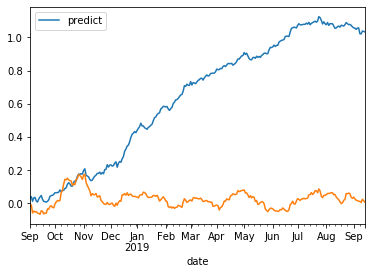

In [653]:
pd.DataFrame(lr.predict(features_test), index=features_test.index, columns=['predict']).plot()
target_test.plot()

In [601]:
lr.coef_

array([-2.15628724e-02,  8.68319999e-04, -2.84312242e-04, -1.94810849e-03,
        8.43797704e-03, -7.29994170e-06,  6.19067569e-05,  9.96066894e-02,
        7.68985795e-02, -6.22250790e-01, -1.06855849e-01, -3.82193018e-02,
        4.81834060e-01, -3.68026412e-03, -1.98123042e-02,  1.29681106e-01,
        1.02545807e-01,  1.16711914e-02, -1.28950424e-01, -1.91539773e-02,
       -7.69688625e-02,  4.99784084e-01,  2.76551624e-01, -8.32607866e-05,
        1.65327156e-03, -2.28538917e-01,  2.36397880e-04, -7.15089168e-03,
       -1.91329822e-08,  1.08705975e-09,  6.22608705e-09,  3.27532982e-08,
        4.53446534e-09, -1.65929818e-11,  3.65038338e-12, -4.45247326e-04,
       -7.23750964e-04, -5.02903799e-04, -2.45332855e-03,  2.64007943e-02,
        3.36822190e-02,  3.06620393e-02,  4.43784090e-02,  5.11857003e-02,
        5.43519967e-02,  5.97692863e-02,  7.00728114e-02,  7.12227974e-02,
        5.37819261e-02,  2.40637683e-02,  3.14280005e-03,  1.70037984e-04,
       -1.41361997e-04,  

In [602]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=42, random_state=42)
random_forest.fit(features_train, target_train)
print(random_forest.score(features_train, target_train))

0.4124548954579228


In [603]:
predictions_test = random_forest.predict(features_test)

In [604]:
random_forest.score(features_test, target_test)

-0.0878319847162563

In [557]:
from sklearn.model_selection import ParameterGrid

grid = {'n_estimators': [200], 'max_depth':[3,5], 'max_features': [20,31,42]}

In [558]:
test_scores = []
# loop through the parameter grid, set hyperparameters, save the scores
for g in ParameterGrid(grid):
    random_forest.set_params(**g) # ** is "unpacking" the dictionary
    random_forest.fit(features_train, target_train)
    test_scores.append(random_forest.score(features_test, target_test))
# find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx])
print(ParameterGrid(grid)[best_idx])

-0.04880843570523874
{'n_estimators': 200, 'max_features': 42, 'max_depth': 3}


In [388]:
random_forest.feature_importances_

array([4.81047742e-02, 2.63898130e-02, 2.72863006e-02, 2.64881483e-02,
       1.86594358e-02, 1.86734890e-02, 1.90210752e-02, 2.96789295e-02,
       4.09516473e-02, 9.35131274e-02, 1.62822872e-02, 2.57629080e-02,
       2.16141917e-02, 1.73894053e-02, 3.58981747e-02, 2.48163987e-02,
       1.78106627e-02, 3.86214314e-02, 2.89921243e-02, 1.68559479e-02,
       2.08471127e-02, 1.76758466e-02, 2.46481047e-02, 3.10551510e-02,
       3.06287070e-02, 1.95104884e-02, 2.40503929e-02, 3.74973743e-02,
       1.65925077e-02, 1.34817518e-02, 2.43435994e-02, 1.57466112e-02,
       2.06535340e-02, 1.86456297e-02, 3.00347147e-02, 4.83578306e-04,
       4.91536334e-04, 5.54296293e-04, 4.75995970e-04, 5.08610951e-05,
       1.37571240e-04, 7.91841450e-05, 1.07587562e-03, 1.48161226e-03,
       2.66309710e-04, 3.78307586e-03, 8.31521793e-05, 1.92369445e-04,
       1.60318488e-05, 1.38828276e-04, 2.99355373e-04, 2.48511722e-05,
       5.44115202e-05, 5.25006579e-04, 1.08507472e-02, 2.44702857e-03,
      

In [532]:
features_train.shape

(3827, 42)

In [533]:
features_train.tail()

,loblaw_price,metro_price,empa_price,gwl_price,atd_price,tsx_price,sp500_price,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-27,53.1305,40.5000,24.7422,98.9396,30.8428,16444.4004,2896.7400,-0.012639,53.394578,52.360834,-0.031624,41.584932,41.083840,-0.003556,24.911442,23.613623,-0.019590,100.921026,102.520272,0.008211,30.252957,29.180259,0.006944,16343.578429,15902.550150,0.013892,2847.240811,2680.688056,391260.0,279260.0,322649.4,105440.0,1400052.8,203252780.0,2.800176e+09,455.930,134.158140,3.7,117.72,88.046512,42.325581,86.627907
2018-08-28,52.9898,40.2845,24.5361,97.9462,30.6015,16355.5000,2897.5200,-0.014537,53.356028,52.365846,-0.017442,41.461081,41.077471,-0.013414,24.875695,23.620973,-0.022239,100.637709,102.483825,-0.003527,30.286152,29.191583,0.003590,16344.713816,15906.159312,0.012071,2852.029306,2682.415801,448460.0,261220.0,301668.0,108060.0,1367408.8,199086260.0,2.707386e+09,457.670,134.155814,3.7,118.38,87.604651,42.232558,87.162791
2018-08-29,53.0289,40.0787,24.4478,98.0427,30.8034,16390.3008,2914.0400,-0.003379,53.324873,52.371129,-0.019652,41.329426,41.069513,-0.004398,24.834943,23.627562,-0.012338,100.390566,102.448438,-0.008086,30.335413,29.204427,0.002630,16349.055434,15910.017013,0.018247,2857.935086,2684.261412,471220.0,260820.0,308706.4,104220.0,1166516.4,195072260.0,2.727846e+09,459.410,134.153488,3.7,118.46,87.162791,42.139535,87.697674
2018-08-30,53.1461,40.2453,24.7912,98.4670,31.0988,16371.5996,2901.1299,-0.006139,53.307847,52.377304,-0.011310,41.226176,41.062945,0.000791,24.830777,23.636834,-0.007582,100.207369,102.416713,0.013968,30.408117,29.219521,0.002744,16351.202497,15913.694962,0.015453,2862.048878,2685.989447,475700.0,261720.0,315091.0,93380.0,1079997.6,204163000.0,2.745500e+09,460.238,134.151163,3.7,118.12,86.720930,42.046512,88.232558
2018-08-31,52.7631,40.0298,24.4086,98.0234,30.7689,16262.9004,2901.5200,-0.007791,53.255966,52.380378,-0.012566,41.112235,41.054713,-0.011914,24.790570,23.642983,-0.009260,99.999372,102.381707,0.004341,30.442477,29.231867,-0.005698,16342.792774,15916.477475,0.009333,2865.808032,2687.706822,601380.0,331860.0,347694.6,107900.0,1206921.2,205273980.0,2.802314e+09,461.066,134.148837,3.7,117.48,86.279070,41.953488,88.767442


In [534]:
features_test.head()

,loblaw_price,metro_price,empa_price,gwl_price,atd_price,tsx_price,sp500_price,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-02,72.6934,56.425,36.51115,107.9041,41.27975,16420.6494,2916.365,0.025133,70.984498,64.144808,0.038809,54.260648,48.183821,0.014819,36.094525,30.165004,0.020807,106.213139,99.091701,0.033966,40.885554,37.672393,0.019992,16288.964103,16055.227126,0.013197,2908.590639,2831.160410,458740.0,488200.0,446971.0,158900.0,1754707.4,194996030.0,3.206662e+09,420.288,136.8,3.95,117.56,89.767442,35.465116,68.883721
2019-09-03,72.8328,56.560,36.41650,108.1529,40.78120,16399.1992,2906.270,0.021505,71.160527,64.214035,0.031080,54.479634,48.250563,-0.006794,36.125190,30.214816,0.012862,106.397878,99.163901,0.000243,40.875616,37.697165,0.013322,16299.462684,16057.967940,0.012934,2908.369626,2831.758893,438700.0,478680.0,409347.6,136500.0,1576798.2,193228150.0,3.185294e+09,421.084,136.8,3.95,117.26,89.302326,35.395349,68.651163
2019-09-04,73.4501,56.870,37.04440,109.4766,41.05040,16448.8008,2937.780,0.027151,71.378582,64.287629,0.027770,54.707288,48.319244,-0.005084,36.212733,30.269235,0.017388,106.691090,99.246074,0.004758,40.892262,37.723884,0.010884,16313.685362,16061.082146,0.017258,2911.170614,2832.603683,512180.0,538280.0,416385.2,161060.0,1684706.6,197013830.0,3.198462e+09,421.880,136.8,3.95,117.61,88.837209,35.325581,68.418605
2019-09-05,73.9281,57.640,37.05430,109.8349,41.53900,16574.8008,2976.000,0.021743,71.621393,64.364446,0.029449,54.986594,48.393513,0.008135,36.292883,30.323300,0.014338,106.990500,99.330447,0.001922,40.953856,37.754283,0.011615,16338.553499,16065.175522,0.017582,2917.344841,2833.746283,542720.0,565000.0,448702.0,186100.0,1812884.6,207672690.0,3.341364e+09,423.224,136.8,3.95,117.81,88.372093,35.255814,68.186047
2019-09-06,73.8982,57.890,36.97460,110.6809,42.58600,16535.3008,2978.710,0.018527,71.838232,64.440412,0.028424,55.263109,48.469182,0.010075,36.357808,30.376298,0.028105,107.341967,99.420889,0.019333,41.109298,37.792783,0.005668,16357.291337,16068.921540,0.017854,2923.189142,2834.901372,551360.0,569660.0,418510.2,183460.0,1961443.0,209343350.0,3.381330e+09,424.568,136.8,3.95,118.13,87.906977,35.186047,67.953488


In [219]:
df.shape

(4121, 60)

In [170]:
feature_columns

['loblaw_price',
 'metro_price',
 'empa_price',
 'gwl_price',
 'atd_price',
 'tsx_price',
 'sp500_price',
 'loblaw_5d_future_price',
 'loblaw_price_5d_pct',
 'loblaw_price_ema20',
 'loblaw_price_ema250',
 'metro_price_5d_pct',
 'metro_price_ema20',
 'metro_price_ema250',
 'empa_price_5d_pct',
 'empa_price_ema20',
 'empa_price_ema250',
 'gwl_price_5d_pct',
 'gwl_price_ema20',
 'gwl_price_ema250',
 'atd_price_5d_pct',
 'atd_price_ema20',
 'atd_price_ema250',
 'tsx_price_5d_pct',
 'tsx_price_ema20',
 'tsx_price_ema250',
 'sp500_price_5d_pct',
 'sp500_price_ema20',
 'sp500_price_ema250',
 'loblaw_5d_future_price_5d_pct',
 'loblaw_5d_future_price_ema20',
 'loblaw_5d_future_price_ema250',
 'loblaw_volume_5d_rolling',
 'metro_volume_5d_rolling',
 'empa_volume_5d_rolling',
 'gwl_volume_5d_rolling',
 'atd_volume_5d_rolling',
 'tsx_volume_5d_rolling',
 'sp500_volume_5d_rolling',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'week_2',
 'week_3',
 'week_4',
 'week_5',
 'week_6',
 'week_

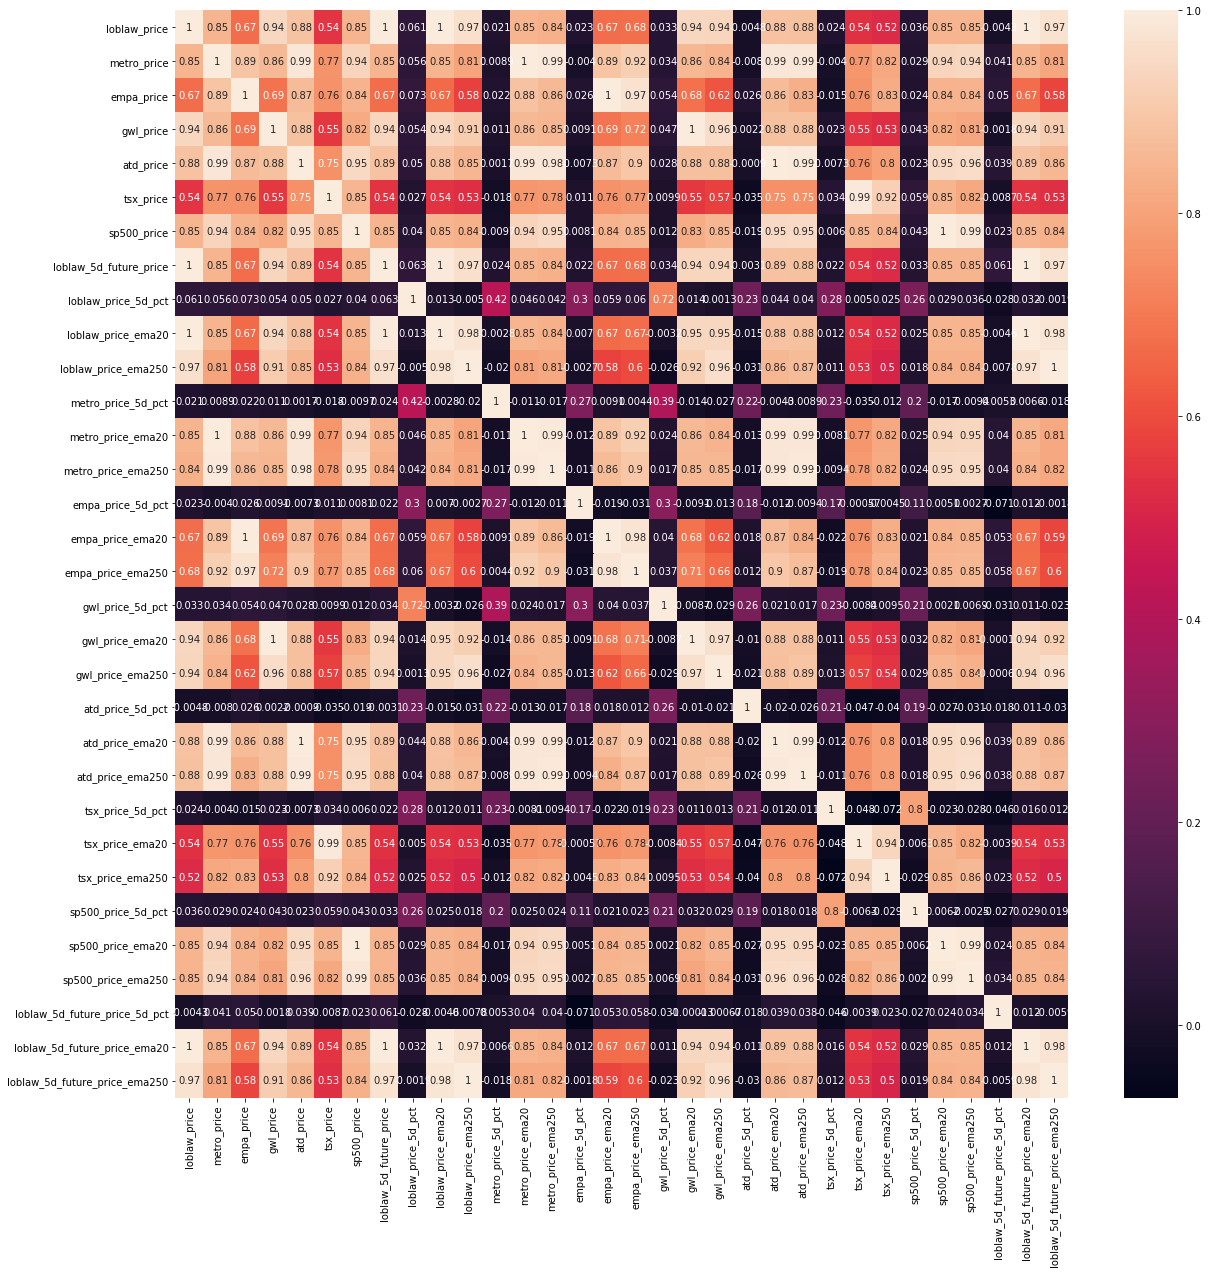

In [134]:
_, ax =plt.subplots(figsize=(20,20))
sns.heatmap(df[feature_columns].corr(), annot=True, ax=ax)

In [54]:
 df['loblaw_volume_5d_rolling'] = df.loblaw_volume.rolling(window=5).mean()

In [65]:
df = df[:-5]

In [74]:
df = df[5:]

In [75]:
df.tail(10)

,loblaw_price,loblaw_volume,metro_price,metro_volume,empa_price,empa_volume,gwl_price,gwl_volume,atd_price,atd_volume,tsx_price,tsx_volume,sp500_price,sp500_volume,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock,loblaw_5d_pct,loblaw_5d_future_price,loblaw_5d_future_pct,return_level,loblaw_volume_5d_rolling
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-30,75.46,463100.0,58.33,530100.0,35.7487,450567.0,111.46,210800.0,40.60,1718934.0,16658.5996,200791800.0,2976.7400,3.247610e+09,432.33,136.8,3.95,118.00,80.465116,34.069767,64.232558,0.005463,75.110,-0.004638,2.0,447760.0
2019-10-01,74.81,413800.0,57.63,798300.0,35.9281,421071.0,110.59,221500.0,40.18,1620315.0,16447.6992,225195700.0,2940.2500,3.558040e+09,432.33,136.8,3.95,118.04,80.000000,34.000000,64.000000,-0.012670,74.030,-0.010426,1.0,426820.0
2019-10-02,74.88,358800.0,58.05,669800.0,36.1374,385020.0,110.73,187400.0,40.40,1149138.0,16311.0000,218200100.0,2887.6101,3.912520e+09,432.33,136.8,3.95,117.52,80.000000,34.000000,64.000000,-0.010571,74.150,-0.009749,1.0,408600.0
2019-10-03,75.20,474500.0,58.00,976400.0,36.6756,1192967.0,111.07,183800.0,41.22,3018224.0,16369.0000,237883100.0,2910.6299,3.503640e+09,432.33,136.8,3.95,117.04,80.000000,34.000000,64.000000,0.001865,73.430,-0.023537,0.0,420200.0
2019-10-04,74.85,424100.0,57.81,579200.0,36.6058,690820.0,111.05,216200.0,40.66,1127493.0,16449.4004,183485000.0,2952.0100,2.990830e+09,432.33,136.8,3.95,117.02,80.000000,34.000000,64.000000,0.001338,73.010,-0.024582,0.0,426860.0
2019-10-07,75.11,317700.0,58.15,568100.0,36.8151,367664.0,111.50,216800.0,40.38,1136853.0,16421.8008,155833300.0,2938.7900,2.940140e+09,432.33,136.8,3.95,117.16,80.000000,34.000000,64.000000,-0.004638,72.805,-0.030688,0.0,397780.0
2019-10-08,74.03,546600.0,57.69,598900.0,36.3368,441693.0,110.57,239800.0,40.03,2054431.0,16294.0000,198432200.0,2893.0601,3.356450e+09,432.33,136.8,3.95,117.08,80.000000,34.000000,64.000000,-0.010426,72.600,-0.019316,0.0,424340.0
2019-10-09,74.15,659800.0,57.74,467000.0,35.9580,433538.0,111.50,184200.0,40.88,2100359.0,16379.9004,168389300.0,2919.3999,2.726820e+09,432.33,136.8,3.95,117.03,80.000000,34.000000,64.000000,-0.009749,71.620,-0.034120,0.0,484540.0
2019-10-10,73.43,591200.0,57.20,471700.0,35.3800,865449.0,110.96,114500.0,40.10,1739158.0,16422.6992,186014600.0,2938.1299,3.217250e+09,432.33,136.8,3.95,117.15,80.000000,34.000000,64.000000,-0.023537,71.500,-0.026284,0.0,507880.0


In [76]:
df.head()

,loblaw_price,loblaw_volume,metro_price,metro_volume,empa_price,empa_volume,gwl_price,gwl_volume,atd_price,atd_volume,tsx_price,tsx_volume,sp500_price,sp500_volume,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock,loblaw_5d_pct,loblaw_5d_future_price,loblaw_5d_future_pct,return_level,loblaw_volume_5d_rolling
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-09,39.4905,326100.0,4.1397,522600.0,4.7933,145686.0,75.2209,96000.0,1.3094,1552296.0,8352.2002,202380200.0,1121.86,1.720700e+09,371.148,103.385714,4.50,114.45,46.142857,26.571429,16.714286,-0.015477,39.6679,0.004492,2.0,299360.0
2004-01-12,39.7979,224100.0,4.1118,268200.0,4.7879,55167.0,74.5622,75300.0,1.2975,1398252.0,8380.4004,140994100.0,1127.23,1.510200e+09,372.062,103.400000,4.50,114.03,46.000000,26.500000,16.666667,-0.004144,39.6974,-0.002525,2.0,313820.0
2004-01-13,39.3132,116100.0,4.1211,463800.0,4.8610,23247.0,72.8248,74900.0,1.2931,634488.0,8380.2998,154429100.0,1121.22,1.595900e+09,372.976,103.414286,4.50,114.20,45.857143,26.428571,16.619048,-0.014084,39.8452,0.013532,3.0,262540.0
2004-01-14,39.1417,170300.0,4.1006,285000.0,5.0236,68055.0,72.9334,88300.0,1.2882,727896.0,8403.7998,171801600.0,1130.52,1.514600e+09,373.890,103.428571,4.50,112.96,45.714286,26.357143,16.571429,-0.029180,39.2836,0.003625,2.0,257320.0
2004-01-15,39.2540,83000.0,4.0746,1750500.0,5.1168,333249.0,72.9696,92800.0,1.2872,456180.0,8423.9004,179088100.0,1132.05,1.695000e+09,372.960,103.442857,4.45,112.26,45.571429,26.285714,16.523810,-0.016296,39.2481,-0.000150,2.0,183920.0


In [77]:
df[['loblaw_5d_future_pct', 'loblaw_5d_pct', 'loblaw_price', 'loblaw_volume', 'loblaw_volume_5d_rolling']].describe()

,loblaw_5d_future_pct,loblaw_5d_pct,loblaw_price,loblaw_volume,loblaw_volume_5d_rolling
count,4111.000000,4111.000000,4111.000000,4.111000e+03,4.111000e+03
mean,0.001092,0.001106,37.227880,5.876207e+05,5.875202e+05
std,0.026899,0.026889,13.369394,5.897142e+05,3.898801e+05
min,-0.204514,-0.204514,16.836000,0.000000e+00,6.210000e+04
25%,-0.013388,-0.013384,26.160100,3.128500e+05,3.650350e+05
50%,0.000000,0.000000,33.936700,4.725000e+05,5.150000e+05
75%,0.014879,0.014879,49.737950,6.993500e+05,7.039400e+05
max,0.240380,0.240380,75.770000,1.482520e+07,5.593500e+06


In [78]:
import statsmodels.api as sm

linear_features = sm.add_constant(df[['loblaw_5d_pct', 'loblaw_price', 'loblaw_volume', 'loblaw_volume_5d_rolling']])

train_size = int(0.85 * df[['loblaw_5d_future_pct']].shape[0])

train_features = linear_features[:train_size]
train_targets = df[['loblaw_5d_future_pct']][:train_size]
test_features = linear_features[train_size:]
test_targets = df[['loblaw_5d_future_pct']][train_size:]

/home/paul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [79]:
model = sm.OLS(train_targets, train_features)
results = model.fit()

In [80]:
print(results.summary())

OLS Regression Results                             
Dep. Variable:     loblaw_5d_future_pct   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     3.249
Date:                  Sun, 20 Oct 2019   Prob (F-statistic):             0.0114
Time:                          11:09:42   Log-Likelihood:                 7556.5
No. Observations:                  3494   AIC:                        -1.510e+04
Df Residuals:                      3489   BIC:                        -1.507e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.00

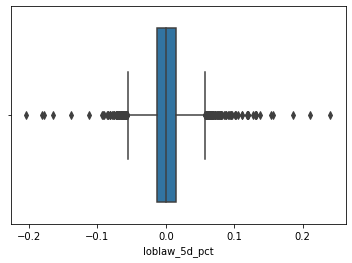

In [31]:
sns.boxplot(df.loblaw_5d_pct)

In [535]:
pd.concat([target_test, features_test], axis=1)

,loblaw_5d_future_pct,loblaw_price,metro_price,empa_price,gwl_price,atd_price,tsx_price,sp500_price,loblaw_price_5d_pct,loblaw_price_ema20,loblaw_price_ema250,metro_price_5d_pct,metro_price_ema20,metro_price_ema250,empa_price_5d_pct,empa_price_ema20,empa_price_ema250,gwl_price_5d_pct,gwl_price_ema20,gwl_price_ema250,atd_price_5d_pct,atd_price_ema20,atd_price_ema250,tsx_price_5d_pct,tsx_price_ema20,tsx_price_ema250,sp500_price_5d_pct,sp500_price_ema20,sp500_price_ema250,loblaw_volume_5d_rolling,metro_volume_5d_rolling,empa_volume_5d_rolling,gwl_volume_5d_rolling,atd_volume_5d_rolling,tsx_volume_5d_rolling,sp500_volume_5d_rolling,BCPI,CPI,bank_interest,CEER,trend_grocery_store,trend_loblaws,trend_stock
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-02,0.020409,72.6934,56.425,36.51115,107.9041,41.27975,16420.6494,2916.3650,0.025133,70.984498,64.144808,0.038809,54.260648,48.183821,0.014819,36.094525,30.165004,0.020807,106.213139,99.091701,0.033966,40.885554,37.672393,0.019992,16288.964103,16055.227126,0.013197,2908.590639,2831.160410,458740.0,488200.0,446971.0,158900.0,1754707.4,194996030.0,3.206662e+09,420.288,136.8,3.95,117.56,89.767442,35.465116,68.883721
2019-09-03,0.010800,72.8328,56.560,36.41650,108.1529,40.78120,16399.1992,2906.2700,0.021505,71.160527,64.214035,0.031080,54.479634,48.250563,-0.006794,36.125190,30.214816,0.012862,106.397878,99.163901,0.000243,40.875616,37.697165,0.013322,16299.462684,16057.967940,0.012934,2908.369626,2831.758893,438700.0,478680.0,409347.6,136500.0,1576798.2,193228150.0,3.185294e+09,421.084,136.8,3.95,117.26,89.302326,35.395349,68.651163
2019-09-04,-0.015182,73.4501,56.870,37.04440,109.4766,41.05040,16448.8008,2937.7800,0.027151,71.378582,64.287629,0.027770,54.707288,48.319244,-0.005084,36.212733,30.269235,0.017388,106.691090,99.246074,0.004758,40.892262,37.723884,0.010884,16313.685362,16061.082146,0.017258,2911.170614,2832.603683,512180.0,538280.0,416385.2,161060.0,1684706.6,197013830.0,3.198462e+09,421.880,136.8,3.95,117.61,88.837209,35.325581,68.418605
2019-09-05,-0.022834,73.9281,57.640,37.05430,109.8349,41.53900,16574.8008,2976.0000,0.021743,71.621393,64.364446,0.029449,54.986594,48.393513,0.008135,36.292883,30.323300,0.014338,106.990500,99.330447,0.001922,40.953856,37.754283,0.011615,16338.553499,16065.175522,0.017582,2917.344841,2833.746283,542720.0,565000.0,448702.0,186100.0,1812884.6,207672690.0,3.341364e+09,423.224,136.8,3.95,117.81,88.372093,35.255814,68.186047
2019-09-06,-0.019733,73.8982,57.890,36.97460,110.6809,42.58600,16535.3008,2978.7100,0.018527,71.838232,64.440412,0.028424,55.263109,48.469182,0.010075,36.357808,30.376298,0.028105,107.341967,99.420889,0.019333,41.109298,37.792783,0.005668,16357.291337,16068.921540,0.017854,2923.189142,2834.901372,551360.0,569660.0,418510.2,183460.0,1961443.0,209343350.0,3.381330e+09,424.568,136.8,3.95,118.13,87.906977,35.186047,67.953488
2019-09-09,-0.030427,74.1770,57.900,36.84500,110.7704,43.16930,16495.0996,2978.4299,0.020409,72.060972,64.517994,0.026141,55.514241,48.544328,0.009144,36.404207,30.427842,0.026563,107.668484,99.511324,0.045774,41.305489,37.835624,0.004534,16370.415933,16072.317381,0.021282,2928.450167,2836.045026,544860.0,614460.0,394894.8,177220.0,1986544.0,212681440.0,3.538384e+09,425.912,136.8,3.95,118.29,87.441860,35.116279,67.720930
2019-09-10,-0.019144,73.6194,57.400,36.12750,110.4121,43.18420,16537.3008,2979.3899,0.010800,72.209393,64.590515,0.014851,55.693837,48.614891,-0.007936,36.377854,30.473257,0.020889,107.929781,99.598182,0.058924,41.484414,37.878242,0.008421,16386.309730,16076.022428,0.025159,2933.301570,2837.187216,547640.0,678860.0,415619.6,185320.0,1999562.8,215709220.0,3.731180e+09,427.256,136.8,3.95,118.33,86.976744,35.046512,67.488372
2019-09-11,0.011820,72.3350,57.450,35.74870,109.8150,42.92000,16611.0996,3000.9299,-0.015182,72.221356,64.652224,0.010199,55.861091,48.685290,-0.034977,36.317935,30.515293,0.003091,108.109326,99.679591,0.045544,41.621136,37.918415,0.009867,16407.718289,16080.285991,

In [524]:
target_train

date
2004-01-01    0.002598
2004-01-02   -0.015477
2004-01-05   -0.004144
2004-01-06   -0.014084
2004-01-07   -0.029180
2004-01-08   -0.016296
2004-01-09    0.004492
2004-01-12   -0.002525
2004-01-13    0.013532
2004-01-14    0.003625
2004-01-15   -0.000150
2004-01-16   -0.014904
2004-01-19   -0.035740
2004-01-20   -0.040060
2004-01-21   -0.021821
2004-01-22   -0.009188
2004-01-23   -0.007565
2004-01-26    0.029034
2004-01-27    0.016230
2004-01-28    0.019232
2004-01-29    0.015810
2004-01-30    0.013109
2004-02-02    0.001051
2004-02-03    0.006843
2004-02-04   -0.015851
2004-02-05   -0.023495
2004-02-06   -0.019560
2004-02-09   -0.026986
2004-02-10   -0.027946
2004-02-11   -0.015797
                ...   
2018-11-20    0.044064
2018-11-21    0.003645
2018-11-22    0.021485
2018-11-23    0.004754
2018-11-26    0.007211
2018-11-27    0.001964
2018-11-28    0.024426
2018-11-29    0.011414
2018-11-30   -0.004569
2018-12-03    0.014317
2018-12-04    0.007673
2018-12-05   -0.004512
2018-1